In [1]:
from pathlib import Path
from funman.api.run import Runner

%load_ext autoreload
%autoreload 2

In [2]:
# Setup Paths
RESOURCES = Path("../resources").resolve()
EXAMPLE_DIR = RESOURCES / "amr" / "petrinet" / "amr-examples"
MODEL_PATH = EXAMPLE_DIR / "sir.json"
REQUEST_PATH = EXAMPLE_DIR / "sir_request1.json"

request_dict = {
    # "query": {
    #     "variable": "I",
    #     "ub": 300
    # },
  "constraints": [
      { 
        "name": "I_bounds",
        "variable" : "I", 
        "bounds": {"lb":0.85, "ub":2},
        "timepoints": {"lb":1, "ub":2}
       },
        { 
        "name": "R_bounds",
        "variable" : "R", 
        "bounds": {"lb":0, "ub":1},
        "timepoints": {"lb":0, "ub":2}
       },
      #   { 
      #   "name": "S_bounds",
      #   "variable" : "S", 
      #   "bounds": {"lb":980, "ub":1000},
      #   "timepoints": {"lb":4, "ub":5}
      #  }
  ],
  "parameters": [
    {
      "name": "beta",
      "lb": 2.6e-7,
      "ub": 2.8e-7,
      "label": "all"
    },
    {
      "name": "gamma",
      "lb": 0.1,
      "ub": 0.18,
      "label": "all"
    },
    {
      "name": "S0",
      "lb": 1000,
      "ub": 1000,
      "label": "any"
    },
    {
      "name": "I0",
      "lb": 1,
      "ub": 1,
      "label": "any"
    },
    {
      "name": "R0",
      "lb": 0,
      "ub": 0,
      "label": "any"
    }
  ],
  "structure_parameters": [
    {
      "name": "num_steps",
      "lb": 1,
      "ub": 20,
      "label": "all"
    },
    {
      "name": "step_size",
      "lb": 1,
      "ub": 1,
      "label": "all"
    }
  ],
  "config": {
    "normalization_constant": 1001,
    "simplify_query": False,
    "normalize": False,
    "substitute_subformulas": True,
    "tolerance": 1e-3
  }
}
    
# Use request_dict
results = Runner().run(MODEL_PATH, request_dict, description="Basic SIR with simple request", case_out_dir="./out")

# Use request file
# results = Runner().run(MODEL_PATH, REQUEST_PATH, description="Basic SIR with simple request", case_out_dir="./out")

INFO:funman.server.worker:FunmanWorker running...
INFO:funman.server.worker:Starting work on: b705ac46-dfd1-4b11-8420-d6fcf3050396


+++ [0.08000000000000001554312234475] True(Box({'beta': {'lb': 2.6000000000000005e-07, 'ub': 2.8e-07}, 'gamma': {'lb': 0.1, 'ub': 0.18000000000000002}, 'S0': {'lb': 1000.0, 'ub': 1000.0}, 'I0': {'lb': 1.0, 'ub': 1.0}, 'R0': {'lb': 0.0, 'ub': 0.0}, 'num_steps': {'lb': 1.0, 'ub': 1.0}, 'step_size': {'lb': 1.0, 'ub': 1.0}}), width = 0.08000000000000001554312234475)
progress=0.05 coverage_of_search_space=0.05 coverage_of_representable_space=0.0
XXX [0.08000000000000001554312234475] Split(Box({'beta': {'lb': 2.6000000000000005e-07, 'ub': 2.8e-07}, 'gamma': {'lb': 0.1, 'ub': 0.18000000000000002}, 'S0': {'lb': 1000.0, 'ub': 1000.0}, 'I0': {'lb': 1.0, 'ub': 1.0}, 'R0': {'lb': 0.0, 'ub': 0.0}, 'num_steps': {'lb': 2.0, 'ub': 20.0}, 'step_size': {'lb': 1.0, 'ub': 1.0}}), width = 0.08000000000000001554312234475)
progress=0.05 coverage_of_search_space=0.05 coverage_of_representable_space=0.0
XXX [0.04000000000000000777156117238] Split(Box({'beta': {'lb': 2.6000000000000005e-07, 'ub': 2.8e-07}, 'gam

In [27]:
results.parameter_space.true_boxes, results.parameter_space.false_boxes

([],
 [{'type': 'box', 'label': 'false', 'bounds': {'beta': {'lb': 2.6000000000000005e-07, 'ub': 2.8e-07}, 'gamma': {'lb': 0.16000000000000003, 'ub': 0.18000000000000002}, 'S0': {'lb': 1000.0, 'ub': 1000.0}, 'I0': {'lb': 1.0, 'ub': 1.0}, 'R0': {'lb': 0.0, 'ub': 0.0}, 'num_steps': {'lb': 1.0, 'ub': 20.0}, 'step_size': {'lb': 1.0, 'ub': 1.0}}, 'explanation': {'relevant_assumptions': [{'constraint': {'name': 'I_bounds', 'variable': 'I', 'bounds': {'lb': 0.8500000000000001, 'ub': 2.0}, 'timepoints': {'lb': 1.0, 'ub': 2.0}}}, {'constraint': {'name': 'R_bounds', 'variable': 'R', 'bounds': {'lb': 0.0, 'ub': 1.0}, 'timepoints': {'lb': 0.0, 'ub': 2.0}}}], 'expression': '(((((((((((((((((((((assume_R_bounds & (gamma < 18000000000000003/100000000000000000)) & (beta < (14000000000000001.0 * 1/50000000000000000000000))) & assume_I_bounds) & disj101) & disj103) & disj106) & disj107) & (R_1 = gamma)) & (I_1 = ((1.0 - gamma) + (1000.0 * beta)))) & (((((((((((gamma < 10000000000000001/10000000000000000

In [25]:
results.parameter_space.false_boxes[3].explain()

{'box': {'beta': {'lb': 2.6000000000000005e-07, 'ub': 2.8e-07},
  'gamma': {'lb': 0.15125000000000002, 'ub': 0.15250000000000002},
  'S0': {'lb': 1000.0, 'ub': 1000.0},
  'I0': {'lb': 1.0, 'ub': 1.0},
  'R0': {'lb': 0.0, 'ub': 0.0},
  'num_steps': {'lb': 1.0, 'ub': 5.0},
  'step_size': {'lb': 1.0, 'ub': 1.0}},
 'relevant_constraints': [{'name': 'I_bounds',
   'variable': 'I',
   'bounds': {'lb': 0.8500000000000001, 'ub': 2.0},
   'timepoints': {'lb': 1.0, 'ub': 2.0}},
  {'name': 'R_bounds',
   'variable': 'R',
   'bounds': {'lb': 0.0, 'ub': 1.0},
   'timepoints': {'lb': 0.0, 'ub': 2.0}}],
 'expression': '((((((((((((((((((((((assume_R_bounds & (gamma < 18000000000000003/100000000000000000)) & (beta < (14000000000000001.0 * 1/50000000000000000000000))) & assume_I_bounds) & disj89) & disj91) & disj94) & disj95) & (R_1 = gamma)) & (I_1 = ((1.0 - gamma) + (1000.0 * beta)))) & (gamma < 15250000000000003/100000000000000000)) & ((((((((((((gamma < 10000000000000001/100000000000000000) | (beta

results.parameter_space.true_points[0]

In [17]:
results.parameter_space.true_points[0].values

{'beta': 2.7e-07,
 'gamma': 0.12957539809140148,
 'S0': 1000.0,
 'I0': 1.0,
 'R0': 0.0,
 'timer_t_0': 0.0,
 'S_0': 1001000.0,
 'I_0': 1001.0,
 'R_0': 0.0,
 'S_1': 1000999.72973,
 'I_1': 871.5552865105071,
 'R_1': 129.7049734894929,
 'timer_t_1': 1.0,
 'assume_I_bounds': 1.0,
 'assume_I_bounds_1': 1.0,
 'step_size': 1.0,
 'num_steps': 1.0}

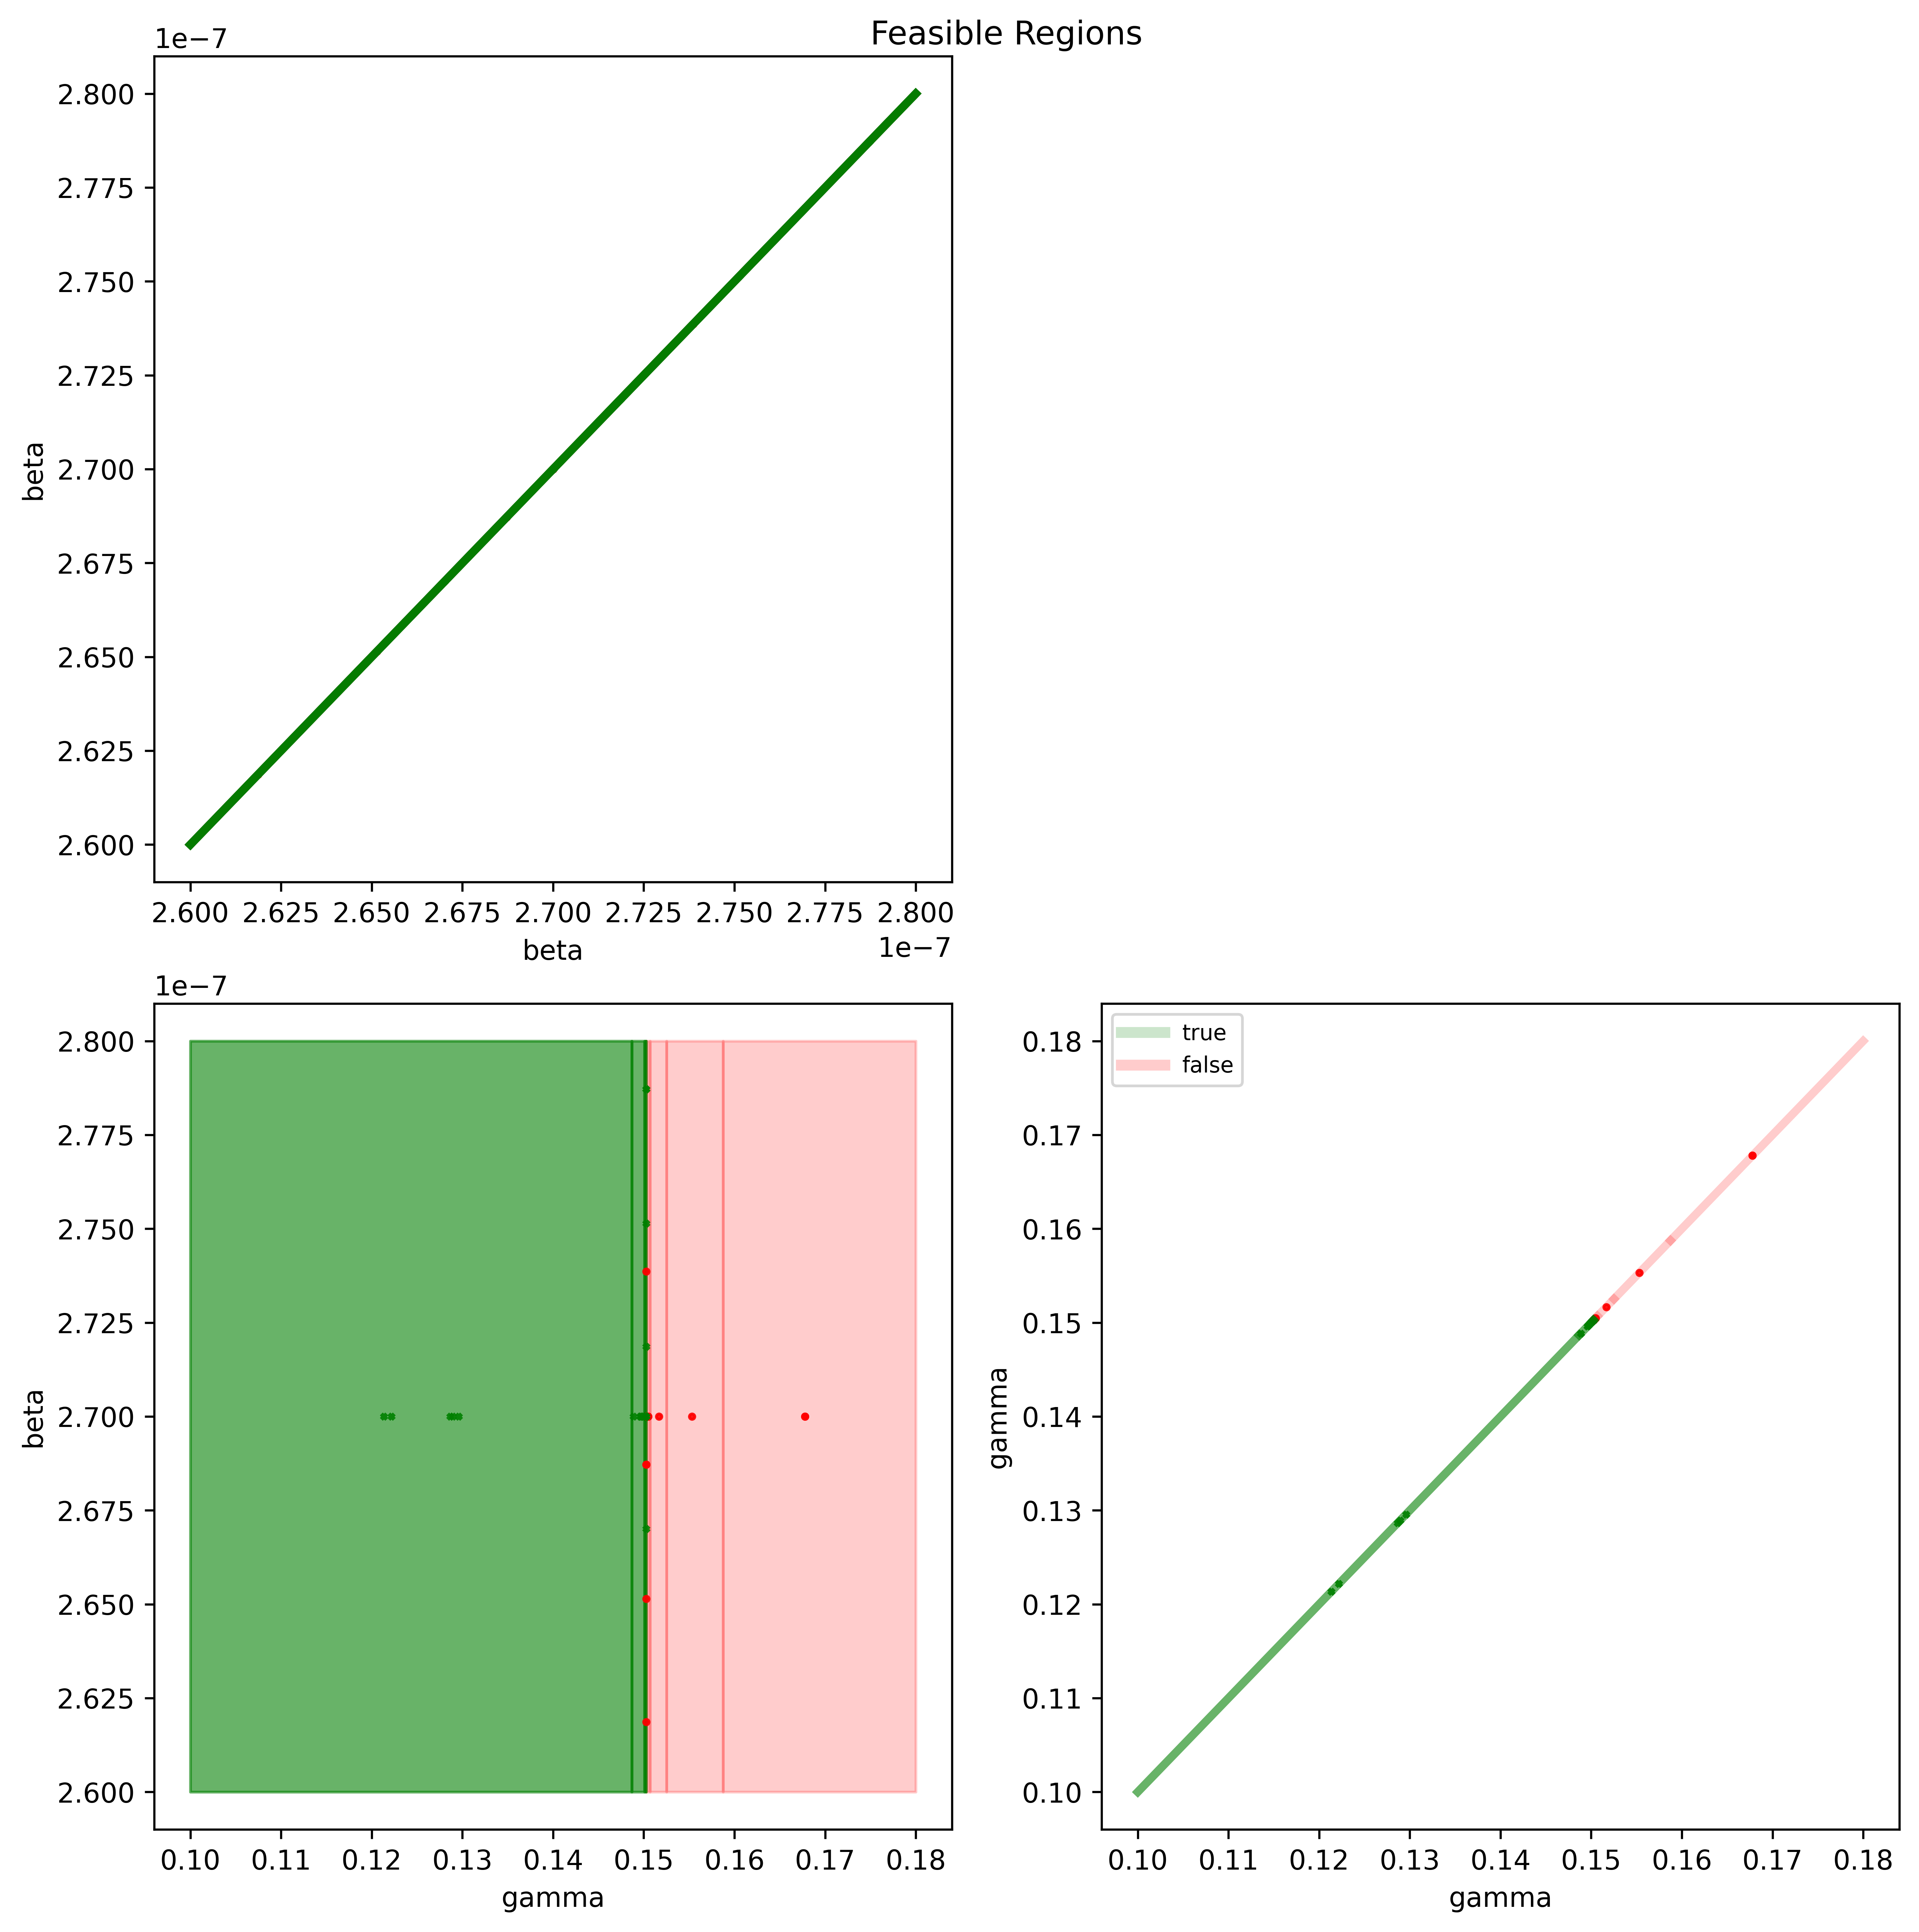

In [11]:
from funman_demo.parameter_space_plotter import ParameterSpacePlotter
ParameterSpacePlotter(
        results.parameter_space, plot_points=True, parameters=["beta", "gamma"]
    ).plot(show=False)

In [ ]:
(
    assume_query & ((beta < 0.00010050000000000001)) & disj10 & disj11 & ((I_1 = (0.92857142857142861 + 9998.0 * beta))) & ((S_1 = (9998.0 - 9998.0 * beta))) & disj12 & disj13 & ((I_2 = (0.86224489795918369 + 1856.07.714285714287 * beta + 9995072.00.14285715 * beta^2.0))) & ((R_2 = (1.1377551020408164 + 71.04.14285714285712 * beta))) & ((S_2 = (9998.0 - 1928.01.857142857145 * beta - 9995072.00.14285715 * beta^2.0))) & disj14 & disj15 & ((I_3 = (0.80065597667638489 + 2586.02.173469387756 * beta + 27843476.04.73542274 * beta^2.0))) & 
    (((beta < 16750000000000001.0/500000000000000000000.0)) | ((beta < 67000000000000003.0/1000000000000000000000.0)) | !(((beta < 0.00010050000000000001))) | !(((I_1 <= 3.0))) | !(((I_1 = (0.92857142857142861 + 9998.0 * beta)))) | !(((S_1 = (9998.0 - 9998.0 * beta)))) | !(((I_2 <= 3.0))) | !(((I_2 = (0.86224489795918369 + 1856.07.714285714287 * beta + 9995072.00.14285715 * beta^2.0)))) | !(((R_2 = (1.1377551020408164 + 71.04.14285714285712 * beta)))) | !(((S_2 = (9998.0 - 1928.01.857142857145 * beta - 9995072.00.14285715 * beta^2.0)))) | !(((I_3 <= 3.0))) | !(((I_3 = (0.80065597667638489 + 2586.02.173469387756 * beta + 27843476.04.73542274 * beta^2.0))))) & (assume_query_1 | !(assume_query) | !(disj10)) & (((I_1 <= 3.0)) | !(assume_query_1) | !(disj11)) & (assume_query_2 | !(assume_query) | !(disj12)) & (((I_2 <= 3.0)) | !(assume_query_2) | !(disj13)) & (assume_query_3 | !(assume_query) | !(disj14)) & (((I_3 <= 3.0)) | !(assume_query_3) | !(disj15)) & !(((beta < 16750000000000001.0/500000000000000000000.0))) & !(((beta < 67000000000000003.0/1000000000000000000000.0)))
)

In [ ]:
(I_3 = (0.80065597667638489 + 2586.02.173469387756 * beta + 27843476.04.73542274 * beta^2.0))